# 3 Finding Similar Items

http://infolab.stanford.edu/~ullman/mmds/ch3.pdf

In [19]:
# https://beta.onefootball.com/fr/news/jean-tigana-rend-hommage-a-michel-hidalgo-29565506
text1 = """
Jean Tigana rend hommage à Michel Hidalgo

Le football français a perdu un monument de son histoire Ce jeudi après-midi, une de ses plus grandes figures a rendu l’âme en la personne de Michel Hidalgo. L’homme qui a offert à l’Equipe de France son tout premier titre majeur en 1984, avec la conquête de l’Euro à domicile, est décédé à 87 ans à Marseille. Une disparition qui marque tout une génération. L'ancien sélectionneur a reçu de nombreux hommages et notamment de ses anciens joueurs.

Giresse : "Hidalgo a donné une identité à l’Equipe de France"
International français entre 1980 et 1988, Jean Tigana a réalisé une grande partie de sa carrière internationale sous les ordres de Michel Hidalgo. L'ancien milieu de terrain de Bordeaux, devenu entraîneur depuis, a été champion d'Europe en 1984 avec l'équipe de France, avec comme sélectionneur Michel Hidalgo. Jean Tigana lui a rendu hommage après sa disparition ce jeudi à l'âge de 87 ans à Marseille, des propos accordés à l'AFP.

Amoros : "On perd un très grand Monsieur"
"C'est une grande tristesse, car c'est quelqu'un qui arrivait à fédérer comme personne. En un coup de fil, il pouvait tous nous réunir. C'est quelqu'un qui était respecté de tous. Ce qui nous marquait chez Michel, c'est son côté humain. Il déléguait énormément, sur le terrain et dans la gestion du groupe, mais il trouvait tout le temps les bons mots. Pour encourager, pour consoler, il savait toujours nous parler. C'était impressionnant chez lui. Avec le président (de la Fédération) Fernand Sastre, ils ont donné du dynamisme au football français, ils ont réussi à lui faire franchir des étapes en prenant pourtant des risques énormes dans le jeu", a déclaré l'ancien milieu de terrain.

Zidane rend hommage à Hidalgo : "Un grand monsieur"
Manuel Amoros lui a également rendu hommage : "C'est quelqu'un qui a énormément compté pour moi. Il m'a donné ma chance à 20 ans et m'a permis de disputer la Coupe du monde en 1982. On perd un très grand Monsieur, qui a fait avancer le football français. C'était un homme de dialogue, qui aimait beaucoup discuter avec ses joueurs avant d'agir, en particulier sur le terrain d'entraînement. Il cherchait avant tout à comprendre comment fonctionnait l'homme, puis il analysait le joueur et c'est la clé de son succès".

Autre poulain de Michel Hidalgo, Daniel Bravo a également eu une pensée pour l'ancien sélectionneur : "Michel Hidalgo fait partie de mes papas du football. Il m'a sélectionné pour la première fois à tout juste 19 ans. Il a même continué à me sélectionner lors de la saison suivante, alors que j'avais été relégué en D2 avec Nice, et certains s'en étaient plaints. Il m'a toujours protégé et a bien expliqué les choses. Quand il ne m'a pas sélectionné pour la Coupe du monde 1982, il a pris le temps de m'envoyer un mot pour m'expliquer que j'avais le temps, qu'il ne fallait pas brûler les étapes et cela m'avait touché. Il avait un très grand coeur, il était hyper-humain et aimait vraiment ses joueurs".
"""

In [20]:
# https://beta.onefootball.com/fr/news/quand-la-france-remportait-leuro-84-avec-hidalgo-29562982
text2 = """
📽Quand la France remportait l'Euro 84 avec Hidalgo 🇫🇷

Le sélectionneur Michel Hidalgo est mort jeudi à l’âge de 87 ans.

Sa plus grande heure de gloire restera la victoire finale à l’Euro 1984 face à l’Espagne. Une nuit légendaire pour un homme qui l’est tout autant. Michel Platini, chef de file émérite des Bleus sur la pelouse, ne dira pas le contraire.
"""

In [21]:
# https://beta.onefootball.com/fr/news/mercato-psg-forlan-verrait-bien-cavani-a-boca-juniors-29571298
text3 = """
Mercato - PSG : Forlan verrait bien Cavani à Boca Juniors

L'histoire d'amour entre Edinson Cavani et le PSG semble toucher à sa fin, alors que l'attaquant uruguayen de 33 ans arrive en fin de contrat en juin prochain. Après avoir tenté de rejoindre l'Atlético Madrid cet hiver, il sera désormais libre de choisir sa future destination.

L'un de ses illustres anciens coéquipiers avec la Céleste, Diego Forlan, a sa petite idée sur la question, même s'il reconnaît qu'elle sera difficile à réaliser. Interrogé par l'émission Como te vaa, Benedetto, le meilleur joueur de la Coupe du monde 2010 a répondu qu'il verrait bien le Matador signer en Argentine.

"J'imagine Edinson Cavani jouant pour Boca, a-t-il ainsi déclaré. Il fait partie de l'élite des footballeurs. Mais ce sera difficile pour des raisons économiques car il est à son zénith. Du point de vue professionnel ce serait un beau et très grand défi.

Diego Forlán en @Comotevaok “#Boca y #River son equipos pesados de América que pelean por títulos locales e internacionales y tienen mucha visibilidad. A pesar de que pagan muy bien para lo que es medio regional, no se compara con lo que ganan allá". https://t.co/mnckh40DYO

— ¿Cómo te vaa, Benedetto? (@Comotevaok) March 27, 2020
"Boca et River sont de grandes équipes d'Amérique et se battent pour les titres nationaux et internationaux. Ils payent bien à l'échelle régionale, a souligné Diego Forlan. Mais ce n'est pas comparable à ce qu'il gagne en Europe."

Dans le même temps, Cavani aurait plusieurs prétendants en Europe, à commencer par l'Atlético Madrid qui avait donc déjà fait parvenir une offre cet hiver au PSG. Il est également suivi par des clubs de Premier League.
"""

In [171]:
texts = {
    "29565506": text1,
    "29562982": text2,
    "29571298": text3
}

# Shingling

In [15]:
import spacy
from textacy import preprocessing as textacy_preprocessing

In [170]:
def preprocess(text):
    return textacy_preprocessing.normalize.normalize_whitespace(
        textacy_preprocessing.normalize.normalize_quotation_marks(
            text
        )
    )

In [54]:
nlp = spacy.load('fr')

In [55]:
def news_shingles(doc):
    shingles = []
    for idx, token in enumerate(doc):
        if token.is_stop:
            shingles.append(" ".join([token.lower_, token.nbor().lower_, token.nbor().nbor().lower_]))
    doc.set_extension("shingles", default={}, force=True)
    doc._.shingles = set(shingles)
    return doc

In [56]:
nlp.add_pipe(news_shingles, last=True)

In [57]:
nlp.pipeline

[('tagger', <spacy.pipeline.pipes.Tagger at 0x152e0a8d0>),
 ('parser', <spacy.pipeline.pipes.DependencyParser at 0x117869440>),
 ('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x1178692f0>),
 ('news_shingles', <function __main__.news_shingles(doc)>)]

In [172]:
doc = nlp(preprocess(texts["29571298"]))
doc._.shingles

{'a -t -il',
 'a pesar de',
 "a répondu qu'",
 'a sa petite',
 'a souligné diego',
 'ainsi déclaré .',
 "alors que l'",
 'après avoir tenté',
 'au psg .',
 'aurait plusieurs prétendants',
 'avait donc déjà',
 'avec la céleste',
 'avoir tenté de',
 'beau et très',
 'bien cavani à',
 'bien le matador',
 'bien para lo',
 "bien à l'",
 'car il est',
 "ce n' est",
 "ce qu' il",
 'ce sera difficile',
 'ce serait un',
 'cet hiver ,',
 'cet hiver au',
 'comparable à ce',
 "d' amour entre",
 "d' amérique et",
 'dans le même',
 'de 33 ans',
 'de américa que',
 'de choisir sa',
 'de contrat en',
 'de grandes équipes',
 "de l' élite",
 'de la coupe',
 'de premier league',
 'de que pagan',
 "de rejoindre l'",
 'de ses illustres',
 'de vue professionnel',
 'des clubs de',
 'des footballeurs .',
 'des raisons économiques',
 'donc déjà fait',
 'du monde 2010',
 'du point de',
 'désormais libre de',
 'elle sera difficile',
 'en @comotevaok "',
 'en argentine .',
 'en europe ,',
 'en europe .',
 'en fin

# Minhashing and Locality Sensitive Hashing

- Create a function that outputs a MinHashLSH model
- Create a function that outputs predictions given the previously obtained model. This output is a list of lists that for each document ID outputs all document IDs which are over the required similarity threshold.
- For each prediction list generate all possible pairs of IDs using `itertools.combinations(i, 2)` where i is the predicted ID list for a certain document.
- Create connected nodes (which will be our clusters) using networkx module:
    ```python
    import networkx as nx
    G = nx.Graph() # build node graph
    G.add_edges_from(flat_list) 
    ```
- Get every cluster's IDs using:
    ```python
    clusters = list(nx.connected_components(G))
    ```
- Loop through the clusters ID and assign each element a unique cluster label.


In [153]:
import itertools

from datasketch import MinHash, MinHashLSH
import networkx as nx
import matplotlib.pyplot as plt

In [128]:
def minhashing(doc):
    m = MinHash(num_perm=128)
    for d in doc._.shingles:
        m.update(d.encode('utf8'))
    doc.set_extension("minhash", default=None, force=True)
    doc._.minhash = m
    return doc

In [129]:
nlp.add_pipe(minhashing, last=True)

In [173]:
corpus = {k: nlp(preprocess(v)) for k, v in texts.items()}

In [174]:
# Create LSH index
lsh = MinHashLSH(threshold=0.05, num_perm=128)

for k, v in corpus.items():
    lsh.insert(k, v._.minhash)

In [177]:
lsh.query(corpus["29565506"]._.minhash)

['29562982', '29565506']

In [178]:
nodes = corpus.keys()

In [179]:
edges = [edge for node in nodes for edge in itertools.combinations(lsh.query(corpus[node]._.minhash), 2)]

In [180]:
G = nx.Graph() # build node graph
G.add_nodes_from(nodes)
G.add_edges_from(edges) 

{'29565506': Text(0.2646120917652154, -0.6199112239886737, '29565506'),
 '29562982': Text(0.3387850245009871, -0.3800887760113262, '29562982'),
 '29571298': Text(-0.6033971162662024, 1.0, '29571298')}

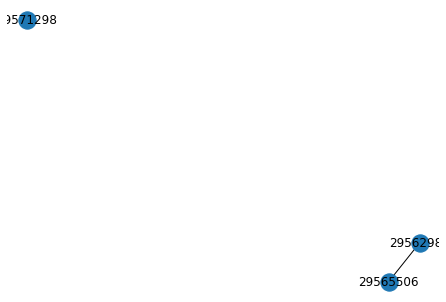

In [181]:
pos = nx.spring_layout(G) # positions for all nodes
nx.draw(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos)

In [182]:
clusters = list(nx.connected_components(G))

In [183]:
clusters

[{'29562982', '29565506'}, {'29571298'}]